<a href="https://colab.research.google.com/github/m-hefnawy/Pytorch-Tutorial-YouTube/blob/main/Intro_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create a Model that inherits nn.Module to classify iris flowers (four features, three classes)
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden layer1 (number of neurons) -->
  # Hidden layer2 (number of neurons) -->
  # Output layer (3 classes)
  def __init__(self, in_features=4, h1=8, h2= 16, out_features=3):
    super().__init__() # inistintiate the nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [5]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of the model
model = Model()
# Load iris data

iris = datasets.load_iris()

my_df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
    )

my_df['variety'] = iris.target
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# Train test split, set X, y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']
X.shape, y.shape, X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: variety
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


((150, 4), (150,), None, None)

In [14]:
# Convert Pandas dataframes to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [21]:
# Convert numpy arrays to float tensors.
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
# Set the criterion  of the model to measure the error, how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer (Adam)\
# Choose learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [27]:
for param in model.parameters(): print(param, param.size())

Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True) torch.Size([8, 4])
Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True) torch.Size([8])
Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0

In [29]:
# Train our model
# Epochs
epochs = 100

losses = []
for i  in range(epochs):
  # Go forward and get predictions
  y_pred = model.forward(X_train) #    Get prediction results

  # Measure the loss/error
  loss = criterion(y_pred, y_train) # predicted value vs y_train

  #keep track or losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs.
  if i % 10 == 0:
    print(f'Epoch: {i} and loss : {loss}')

  # Backpropagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss : 1.1162396669387817
Epoch: 10 and loss : 0.8350213170051575
Epoch: 20 and loss : 0.4811387062072754
Epoch: 30 and loss : 0.246641144156456
Epoch: 40 and loss : 0.11919906735420227
Epoch: 50 and loss : 0.06885357946157455
Epoch: 60 and loss : 0.049146246165037155
Epoch: 70 and loss : 0.03977043554186821
Epoch: 80 and loss : 0.03438020870089531
Epoch: 90 and loss : 0.03080672211945057


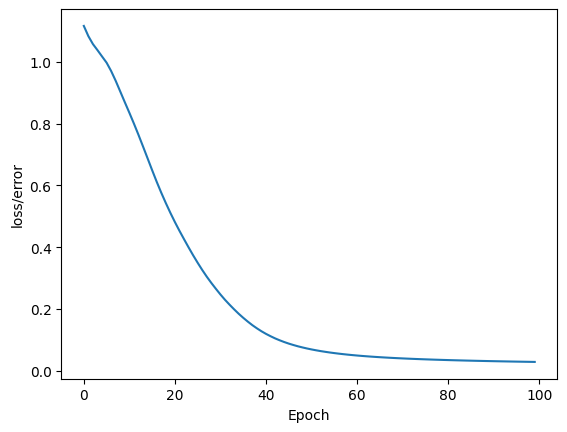

In [34]:
# Graph the loss
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')
plt.show()

In [35]:
# Evaluate Model on test dataset(validate model on test set)

with torch.no_grad(): # turn off back propagation
  y_eval = model.forward(X_test) # X_test , y_eval
  loss = criterion(y_eval, y_test) # find loss


In [36]:
loss

tensor(0.1516)

In [39]:
# find out how many we got correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1.) tensor([-5.2069,  2.9402,  6.6868]) 	 2 	 2
2.) tensor([-7.2156,  1.7538, 11.2554]) 	 2 	 2
3.) tensor([-7.4784,  2.6418, 11.0193]) 	 2 	 2
4.) tensor([-2.5685e+00,  5.5449e+00, -2.8595e-03]) 	 1 	 1
5.) tensor([-6.2725,  2.9518,  8.6075]) 	 2 	 2
6.) tensor([-0.7099,  6.3862, -3.9064]) 	 1 	 1
7.) tensor([-4.6833,  3.8154,  5.0958]) 	 2 	 2
8.) tensor([-2.4111,  5.7417, -0.4329]) 	 1 	 1
9.) tensor([-5.4803,  3.3915,  6.8500]) 	 2 	 2
10.) tensor([-7.6267,  1.8619, 11.9354]) 	 2 	 2
11.) tensor([-4.5455,  3.8650,  4.8096]) 	 2 	 2
12.) tensor([ 11.7055,   4.3532, -22.1332]) 	 0 	 0
13.) tensor([ 10.6975,   3.8775, -20.1954]) 	 0 	 0
14.) tensor([ 0.4766,  5.4938, -5.1468]) 	 1 	 1
15.) tensor([  9.8323,   4.5882, -19.3155]) 	 0 	 0
16.) tensor([-4.3485,  4.1060,  4.2769]) 	 2 	 2
17.) tensor([ 10.3733,   4.2328, -19.9413]) 	 0 	 0
18.) tensor([-5.1259,  3.1700,  6.3713]) 	 1 	 2
19.) tensor([ 12.3525,   4.2219, -23.0333]) 	 0 	 0
20.) tensor([  9.4044,   3.9363, -18.1813]) 	 0 	 0

In [41]:
# Evaluate new data point on the network
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [42]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.4931,   4.0434, -21.5709])


In [43]:
# Save NN model
torch.save(model.state_dict(), 'my_first_nn_iris_model.pt')

In [44]:
# load NN model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_nn_iris_model.pt'))

<All keys matched successfully>

In [45]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)

In [46]:
#Evaluate new data point on the loaded model
new_iris_2 = torch.tensor([1.7, 3.2, 1.3, 3.2])

In [47]:
with torch.no_grad():
  print(new_model(new_iris_2))

tensor([-1.7918,  2.6251,  0.8776])
